In [1]:
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

import random
import ast

##### Reading DF from .csv

In [2]:
daily_stats = pd.read_csv('daily_stats_user.csv', lineterminator='\n', index_col=0)

#### Converting str time series into array

In [3]:
daily_stats['success_ts'] = daily_stats.success_ts.apply(ast.literal_eval)

# Feature clustering

In [4]:
X_bot = []
X_nonbot = []
for row in daily_stats.itertuples():
    if row.bot == 1:
        X_bot.append(row.success_ts)
    else:
        X_nonbot.append(row.success_ts)
        
X_bot = np.array(X_bot)
X_nonbot = np.array(X_nonbot)
X = np.concatenate((X_bot, X_nonbot))

In [5]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

# Features for nonbots

/home/dufnill/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dufnill/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dufnill/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dufnill/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dufnill/.local/lib/python3

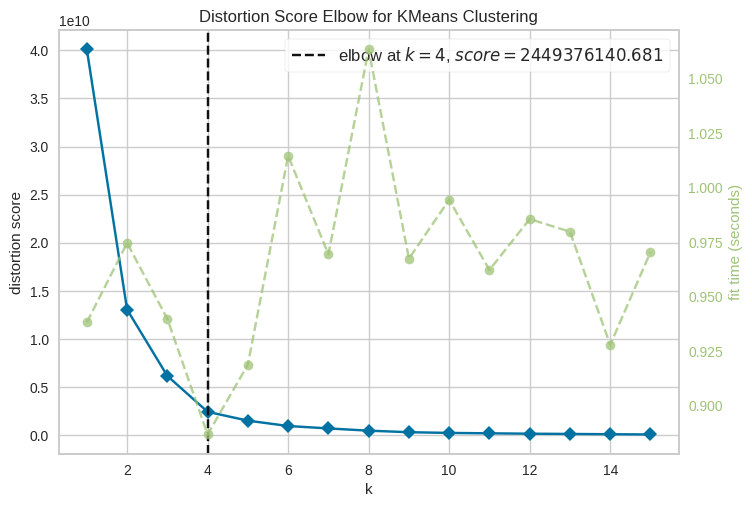

/home/dufnill/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


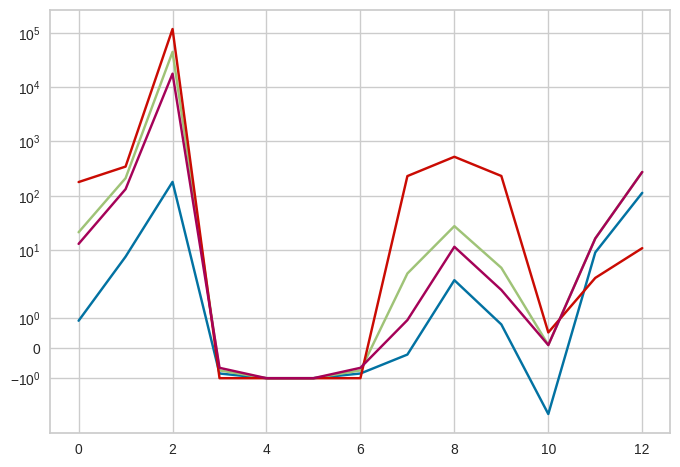

In [6]:
F_nonbot = np.array([list(calculate_features(x).values()) for x in X_nonbot])
model = KMeans()
visualizer_nonbot = KElbowVisualizer(model, k=(1,16), metric="distortion")
visualizer_nonbot.fit(F_nonbot) # Fit the data to the visualizer
visualizer_nonbot.show()  

kmeans = KMeans(n_clusters=4)
kmeans.fit(F_nonbot)

for i in range(4):
    plt.plot(np.mean(F_nonbot[np.where(kmeans.labels_ == i)[0]], axis=0))
plt.yscale('symlog')
plt.show()

# Features for bots

/home/dufnill/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dufnill/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dufnill/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dufnill/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dufnill/.local/lib/python3

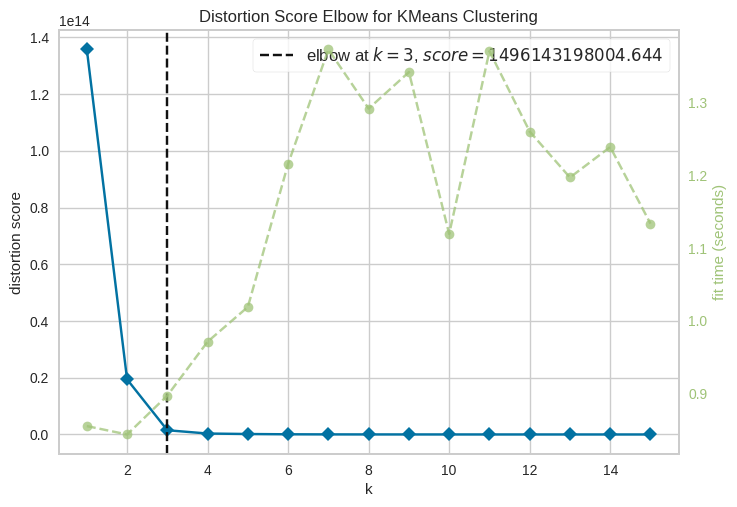

/home/dufnill/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


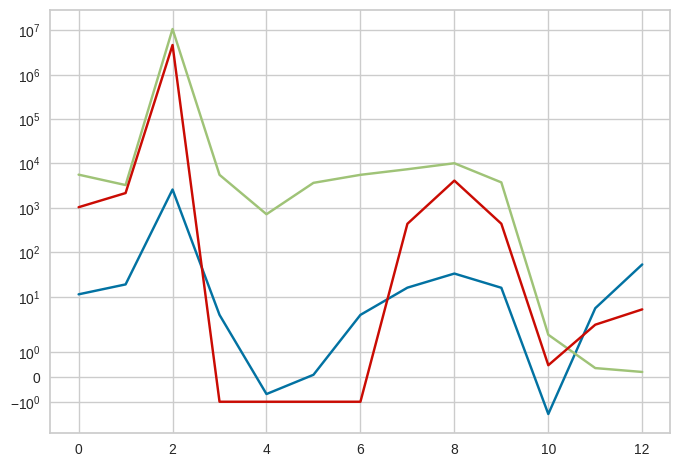

In [7]:
F_bot = np.array([list(calculate_features(x).values()) for x in X_bot])
model = KMeans()
visualizer_bot = KElbowVisualizer(model, k=(1,16), metric="distortion")
visualizer_bot.fit(F_bot) # Fit the data to the visualizer
visualizer_bot.show()  

kmeans = KMeans(n_clusters=3)
kmeans.fit(F_bot)

for i in range(3):
    plt.plot(np.mean(F_bot[np.where(kmeans.labels_ == i)[0]], axis=0))
plt.yscale('symlog')
plt.show()

# Features for every user

/home/dufnill/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dufnill/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dufnill/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dufnill/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dufnill/.local/lib/python3

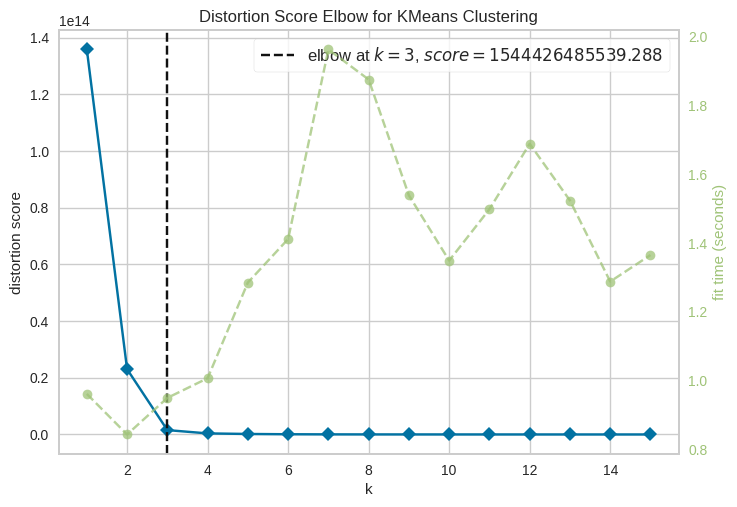

/home/dufnill/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


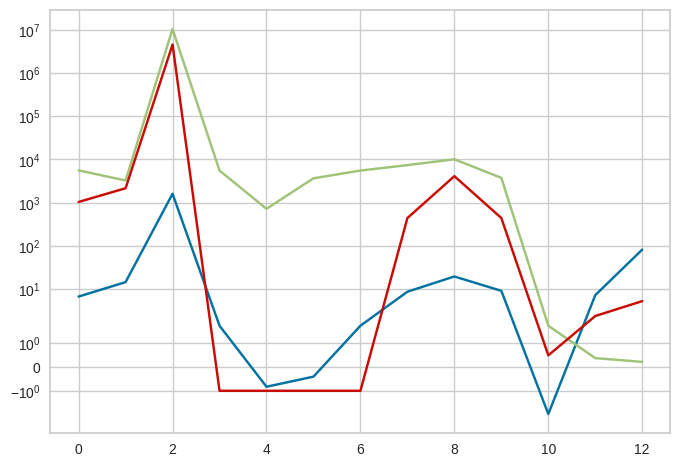

In [8]:
F = np.array([list(calculate_features(x).values()) for x in X])
model = KMeans()
visualizer_nonbot = KElbowVisualizer(model, k=(1,16), metric="distortion")
visualizer_nonbot.fit(F) # Fit the data to the visualizer
visualizer_nonbot.show()  
 
kmeans = KMeans(n_clusters=3)
kmeans.fit(F)

for i in range(3):
    plt.plot(np.mean(F[np.where(kmeans.labels_ == i)[0]], axis=0))
plt.yscale('symlog')
plt.show()